In [1]:
import os
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
home = os.getenv('HOME')
datadir = os.path.join(home, 'Pictures', 'kagglecatsanddogs_3367a', 'PetImages')
categories = ['Cat', 'Dog']

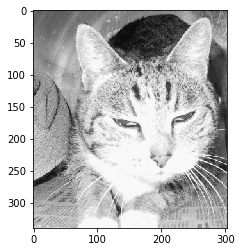

In [3]:
for category in categories:
    path = os.path.join(datadir, category)
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
        plt.imshow(image_array, cmap='gray')
        plt.show()
        break
    break

In [4]:
print(image_array)

[[109 111 112 ... 120  92  92]
 [112 112 111 ... 114  94 114]
 [119 116 113 ... 103  91 112]
 ...
 [175 192 207 ... 185 178 179]
 [193 209 205 ... 202 170 166]
 [203 207 202 ... 183 168 161]]


In [5]:
image_array.shape

(340, 303)

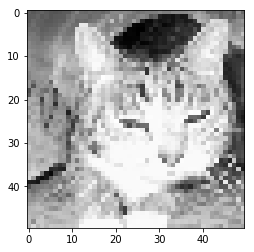

In [6]:
IMAGE_SIZE = 50

new_array = cv2.resize(image_array, (IMAGE_SIZE, IMAGE_SIZE))
plt.imshow(new_array, cmap='gray')

In [7]:
# training_data = []
X_list = []
y_list = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_number = categories.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(image_array, (IMAGE_SIZE, IMAGE_SIZE))
#                 training_data.append([new_array, class_number])
                X_list.append(new_array)
                y_list.append(class_number)
            except Exception as e:
                print('Image {} in category {} was broken'.format(image, category))
                
create_training_data()

Image 3491.jpg in category Cat was broken
Image 4833.jpg in category Cat was broken
Image 5553.jpg in category Cat was broken
Image 2663.jpg in category Cat was broken
Image 9171.jpg in category Cat was broken
Image 8470.jpg in category Cat was broken
Image 7978.jpg in category Cat was broken
Image 7968.jpg in category Cat was broken
Image 936.jpg in category Cat was broken
Image 11565.jpg in category Cat was broken
Image 10820.jpg in category Cat was broken
Image 140.jpg in category Cat was broken
Image 11935.jpg in category Cat was broken
Image 10501.jpg in category Cat was broken
Image Thumbs.db in category Cat was broken
Image 11874.jpg in category Cat was broken
Image 10404.jpg in category Cat was broken
Image 666.jpg in category Cat was broken
Image 11210.jpg in category Cat was broken
Image 850.jpg in category Cat was broken
Image 3300.jpg in category Cat was broken
Image 660.jpg in category Cat was broken
Image 10125.jpg in category Cat was broken
Image 9778.jpg in category Cat

In [8]:
# classes - Cats and Dogs - are balanced,
# that is, there are roughly an equal number of cats and dogs,
# however that's something to keep in mind
print(len(y_list))

24946


In [9]:
# we have to shuffle the data
# so the neural network doesn't overfit one class

# original:
# random.shuffle(training_data)

# my adaptation
# zip both lists:
training_data = list(zip(X_list, y_list))
# shuffle it
random.shuffle(training_data)
# unpack into two lists again
X_list, y_list = zip(*training_data)

y_list 1


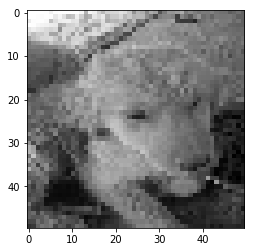

In [10]:
print('y_list', y_list[1])

plt.imshow(X_list[1], cmap='gray')
plt.show()

In [11]:
# the first number, -1, is just the number of images we have
# then the size of each image
# the last number, 1, is because we are dealing with grayscale,
# if we had RGB it would be 3
X = np.array(X_list).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
y = np.array(y_list)

In [12]:
# # to not have to import, resize, reshape the data over and over again
# # we could save it using pickle or any other utility that saves to disk
import pickle

pickle_out = open(os.path.join(datadir, 'X.pkl'), 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open(os.path.join(datadir, 'y.pkl'), 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# # to load the data again using pickle
# pickle_in = open('X.pickle', 'rb')
# X = pickle.load(pickle_in)